In [53]:
import pandas as pd

df = pd.read_csv('random_scenario_bi_flow_features.csv')

print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10046 entries, 0 to 10045
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10046 non-null  int64  
 1   ul_total_num_pkts   10046 non-null  int64  
 2   ul_total_num_bytes  10046 non-null  float64
 3   ul_min_pkt_size     10046 non-null  float64
 4   ul_max_pkt_size     10046 non-null  float64
 5   ul_mean_pkt_size    10046 non-null  float64
 6   ul_std_pkt_size     5864 non-null   float64
 7   ul_min_iat          5864 non-null   float64
 8   ul_max_iat          5864 non-null   float64
 9   ul_mean_iat         5864 non-null   float64
 10  ul_std_iat          5562 non-null   float64
 11  ul_dur              10046 non-null  float64
 12  dl_total_num_pkts   10046 non-null  int64  
 13  dl_total_num_bytes  10046 non-null  float64
 14  dl_min_pkt_size     10046 non-null  float64
 15  dl_max_pkt_size     10046 non-null  float64
 16  dl_m

In [54]:
row_counts = df.groupby('app')['app'].count()

# Print the row counts for each app
print("\nRow Counts by App:")
row_counts


Row Counts by App:


app
dropbox          437
facebook         415
gmail            459
google-drive     201
hulu            1068
instagram        380
messenger        315
netflix          389
pandora         2029
pinterest        557
reddit          1068
spotify          827
twitter         1353
youtube          548
Name: app, dtype: int64

In [55]:
for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):
    df[column].fillna(df[column].mean(), inplace=True)

    df[column] = df[column].apply(lambda x: 0 if x < 0 else x)

print("\nDataFrame after preprocessing:")
print(df.head())


DataFrame after preprocessing:
   Unnamed: 0  ul_total_num_pkts  ul_total_num_bytes  ul_min_pkt_size  \
0           0                  1                76.0             76.0   
1           1                  1                62.0             62.0   
2           2                  2               127.0             52.0   
3           3                  2               135.0             52.0   
4           4                 15              2293.0             52.0   

   ul_max_pkt_size  ul_mean_pkt_size  ul_std_pkt_size  ul_min_iat  ul_max_iat  \
0             76.0         76.000000       205.286998    0.807287    9.686940   
1             62.0         62.000000       205.286998    0.807287    9.686940   
2             75.0         63.500000        16.263456    0.007902    0.007902   
3             83.0         67.500000        21.920310    0.059009    0.059009   
4           1290.0        152.866667       319.976085    0.000153    0.325016   

   ul_mean_iat  ...  dl_mean_iat  dl_std_i

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20508\573560821.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [56]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0            0
ul_total_num_pkts     0
ul_total_num_bytes    0
ul_min_pkt_size       0
ul_max_pkt_size       0
ul_mean_pkt_size      0
ul_std_pkt_size       0
ul_min_iat            0
ul_max_iat            0
ul_mean_iat           0
ul_std_iat            0
ul_dur                0
dl_total_num_pkts     0
dl_total_num_bytes    0
dl_min_pkt_size       0
dl_max_pkt_size       0
dl_mean_pkt_size      0
dl_std_pkt_size       0
dl_min_iat            0
dl_max_iat            0
dl_mean_iat           0
dl_std_iat            0
dl_dur                0
ip_A                  0
port_A                0
ip_B                  0
port_B                0
protocal              0
action                0
app                   0
dtype: int64


In [57]:
non_numeric_columns = df.select_dtypes(exclude=['int', 'float']).columns

# Print the list of non-numeric columns
print("Columns that are not int or float:")
print(list(non_numeric_columns))

Columns that are not int or float:
['ip_A', 'port_A', 'ip_B', 'port_B', 'protocal', 'action', 'app']


In [58]:
row_counts = df.groupby('action')['action'].count()

# Print the row counts for each app
print("\nRow Counts by action:")
row_counts


Row Counts by action:


action
IgSearchBrowse      355
browse              596
browse-home         209
download            333
open-email          255
play-music         1094
play-video          165
post                472
post-tweet          819
scroll-feed         490
scroll-home         409
scroll-newsfeed     174
search              383
search-music       1762
search-page         241
send-email          204
send-message        384
tap-board           557
upload              305
watch-video         839
Name: action, dtype: int64

In [59]:
import ipaddress
def ip_to_decimal(ip_str):
  """Converts an IP address string to its decimal representation."""
  try:
    ip = ipaddress.ip_address(ip_str)
    return int(ip)
  except ValueError:
    return None  # Handle invalid IP addresses

# Apply the conversion to 'ip_A' and 'ip_B' columns
for column in ['ip_A', 'ip_B']:
  if column in df.columns:
    df[column] = df[column].apply(ip_to_decimal)

print(df.head())

   Unnamed: 0  ul_total_num_pkts  ul_total_num_bytes  ul_min_pkt_size  \
0           0                  1                76.0             76.0   
1           1                  1                62.0             62.0   
2           2                  2               127.0             52.0   
3           3                  2               135.0             52.0   
4           4                 15              2293.0             52.0   

   ul_max_pkt_size  ul_mean_pkt_size  ul_std_pkt_size  ul_min_iat  ul_max_iat  \
0             76.0         76.000000       205.286998    0.807287    9.686940   
1             62.0         62.000000       205.286998    0.807287    9.686940   
2             75.0         63.500000        16.263456    0.007902    0.007902   
3             83.0         67.500000        21.920310    0.059009    0.059009   
4           1290.0        152.866667       319.976085    0.000153    0.325016   

   ul_mean_iat  ...  dl_mean_iat  dl_std_iat    dl_dur       ip_A   port_A

In [60]:
nan_columns = df.columns[df.isnull().any()].tolist()

# Print the list of columns with NaN values
print("Columns with NaN values:")
nan_columns

Columns with NaN values:


[]

In [61]:
# Create a label mapping dictionary for the 'protocol' column
unique_protocols = df['protocal'].unique()
protocol_mapping = {protocol: i for i, protocol in enumerate(unique_protocols)}

# Apply the label mapping to the 'protocol' column
df['protocal'] = df['protocal'].map(protocol_mapping)

# Print the mapping values

print("Protocol Mapping Dictionary:")
print(protocol_mapping)

print(df.head())

Protocol Mapping Dictionary:
{'UDP': 0, 'TCP': 1, 'Unknown': 2}
   Unnamed: 0  ul_total_num_pkts  ul_total_num_bytes  ul_min_pkt_size  \
0           0                  1                76.0             76.0   
1           1                  1                62.0             62.0   
2           2                  2               127.0             52.0   
3           3                  2               135.0             52.0   
4           4                 15              2293.0             52.0   

   ul_max_pkt_size  ul_mean_pkt_size  ul_std_pkt_size  ul_min_iat  ul_max_iat  \
0             76.0         76.000000       205.286998    0.807287    9.686940   
1             62.0         62.000000       205.286998    0.807287    9.686940   
2             75.0         63.500000        16.263456    0.007902    0.007902   
3             83.0         67.500000        21.920310    0.059009    0.059009   
4           1290.0        152.866667       319.976085    0.000153    0.325016   

   ul_mean

In [62]:
unique_apps = df['app'].unique()
app_mapping = {app: i for i, app in enumerate(unique_apps)}

df['app'] = df['app'].map(app_mapping)

# Print the mapping values
print("App Mapping Dictionary:")
print(app_mapping)

print(df.head())

App Mapping Dictionary:
{'dropbox': 0, 'facebook': 1, 'gmail': 2, 'google-drive': 3, 'hulu': 4, 'instagram': 5, 'messenger': 6, 'netflix': 7, 'pandora': 8, 'pinterest': 9, 'reddit': 10, 'spotify': 11, 'twitter': 12, 'youtube': 13}
   Unnamed: 0  ul_total_num_pkts  ul_total_num_bytes  ul_min_pkt_size  \
0           0                  1                76.0             76.0   
1           1                  1                62.0             62.0   
2           2                  2               127.0             52.0   
3           3                  2               135.0             52.0   
4           4                 15              2293.0             52.0   

   ul_max_pkt_size  ul_mean_pkt_size  ul_std_pkt_size  ul_min_iat  ul_max_iat  \
0             76.0         76.000000       205.286998    0.807287    9.686940   
1             62.0         62.000000       205.286998    0.807287    9.686940   
2             75.0         63.500000        16.263456    0.007902    0.007902   
3     

In [63]:
unique_action = df['action'].unique()
action_mapping = {action: i for i, action in enumerate(unique_action)}


df['action'] = df['action'].map(action_mapping)

# Print the mapping values
print("Action Mapping Dictionary:")
print(action_mapping)

Action Mapping Dictionary:
{'download': 0, 'upload': 1, 'scroll-newsfeed': 2, 'search-page': 3, 'open-email': 4, 'send-email': 5, 'scroll-home': 6, 'watch-video': 7, 'IgSearchBrowse': 8, 'send-message': 9, 'browse-home': 10, 'play-music': 11, 'search-music': 12, 'tap-board': 13, 'browse': 14, 'post': 15, 'post-tweet': 16, 'scroll-feed': 17, 'play-video': 18, 'search': 19}


In [64]:
df.head()

,Unnamed: 0,ul_total_num_pkts,ul_total_num_bytes,ul_min_pkt_size,ul_max_pkt_size,ul_mean_pkt_size,ul_std_pkt_size,ul_min_iat,ul_max_iat,ul_mean_iat,...,dl_mean_iat,dl_std_iat,dl_dur,ip_A,port_A,ip_B,port_B,protocal,action,app
0,0,1,76.0,76.0,76.0,76.000000,205.286998,0.807287,9.686940,1.488578,...,1.577297,2.280075,0.000000,177357320,35475.0,2152970537,53.0,0,0,0
1,1,1,62.0,62.0,62.0,62.000000,205.286998,0.807287,9.686940,1.488578,...,1.577297,2.280075,0.000000,177357320,38115.0,2152970537,53.0,0,0,0
2,2,2,127.0,52.0,75.0,63.500000,16.263456,0.007902,0.007902,0.007902,...,0.002140,2.280075,0.002140,177357320,38404.0,2899904170,443.0,1,0,0
3,3,2,135.0,52.0,83.0,67.500000,21.920310,0.059009,0.059009,0.059009,...,1.577297,2.280075,0.000000,177357320,41277.0,520969491,443.0,1,0,0
4,4,15,2293.0,52.0,1290.0,152.866667,319.976085,0.000153,0.325016,0.027096,...,0.031919,0.089849,0.414947,177357320,41292.0,520969491,443.0,1,0,0


In [65]:
non_numeric_columns = df.select_dtypes(exclude=['int', 'float']).columns

# Print the list of non-numeric columns
print("Columns that are not int or float:")
print(list(non_numeric_columns))

Columns that are not int or float:
['port_A', 'port_B']


In [66]:
numeric_columns = ['port_A', 'port_B']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [67]:
for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):
    df[column].fillna(df[column].mean(), inplace=True)

    df[column] = df[column].apply(lambda x: 0 if x < 0 else x)

print("\nDataFrame after preprocessing:")
print(df.head())


DataFrame after preprocessing:
   Unnamed: 0  ul_total_num_pkts  ul_total_num_bytes  ul_min_pkt_size  \
0           0                  1                76.0             76.0   
1           1                  1                62.0             62.0   
2           2                  2               127.0             52.0   
3           3                  2               135.0             52.0   
4           4                 15              2293.0             52.0   

   ul_max_pkt_size  ul_mean_pkt_size  ul_std_pkt_size  ul_min_iat  ul_max_iat  \
0             76.0         76.000000       205.286998    0.807287    9.686940   
1             62.0         62.000000       205.286998    0.807287    9.686940   
2             75.0         63.500000        16.263456    0.007902    0.007902   
3             83.0         67.500000        21.920310    0.059009    0.059009   
4           1290.0        152.866667       319.976085    0.000153    0.325016   

   ul_mean_iat  ...  dl_mean_iat  dl_std_i

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20508\573560821.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [37]:
df.head()

,ul_total_num_pkts,ul_total_num_bytes,ul_min_pkt_size,ul_max_pkt_size,ul_mean_pkt_size,ul_std_pkt_size,ul_min_iat,ul_max_iat,ul_mean_iat,ul_std_iat,...,dl_mean_iat,dl_std_iat,dl_dur,ip_A,port_A,ip_B,port_B,protocal,action,app
0,1,76.0,76.0,76.0,76.000000,205.286998,0.807287,9.686940,1.488578,2.193064,...,1.577297,2.280075,0.000000,177357320,35475.0,2152970537,53.0,0,0,0
1,1,62.0,62.0,62.0,62.000000,205.286998,0.807287,9.686940,1.488578,2.193064,...,1.577297,2.280075,0.000000,177357320,38115.0,2152970537,53.0,0,0,0
2,2,127.0,52.0,75.0,63.500000,16.263456,0.007902,0.007902,0.007902,2.193064,...,0.002140,2.280075,0.002140,177357320,38404.0,2899904170,443.0,1,0,0
3,2,135.0,52.0,83.0,67.500000,21.920310,0.059009,0.059009,0.059009,2.193064,...,1.577297,2.280075,0.000000,177357320,41277.0,520969491,443.0,1,0,0
4,15,2293.0,52.0,1290.0,152.866667,319.976085,0.000153,0.325016,0.027096,0.085973,...,0.031919,0.089849,0.414947,177357320,41292.0,520969491,443.0,1,0,0


In [68]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0            0
ul_total_num_pkts     0
ul_total_num_bytes    0
ul_min_pkt_size       0
ul_max_pkt_size       0
ul_mean_pkt_size      0
ul_std_pkt_size       0
ul_min_iat            0
ul_max_iat            0
ul_mean_iat           0
ul_std_iat            0
ul_dur                0
dl_total_num_pkts     0
dl_total_num_bytes    0
dl_min_pkt_size       0
dl_max_pkt_size       0
dl_mean_pkt_size      0
dl_std_pkt_size       0
dl_min_iat            0
dl_max_iat            0
dl_mean_iat           0
dl_std_iat            0
dl_dur                0
ip_A                  0
port_A                0
ip_B                  0
port_B                0
protocal              0
action                0
app                   0
dtype: int64


In [69]:
df.to_csv('Processed_random.csv', index=False)
'''
    PreProcessing is done here
'''

Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94
ROC AUC Score: 1.00


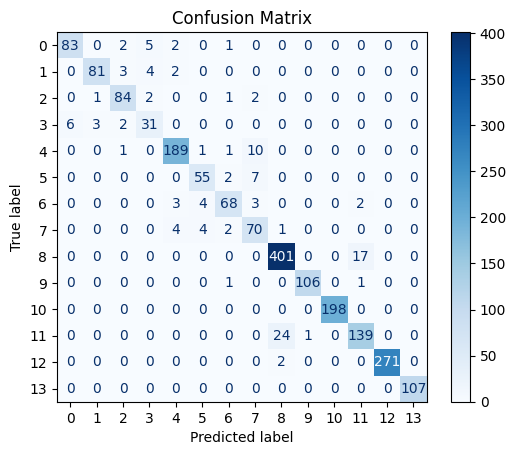

InvalidIndexError: (slice(None, None, None), 0)

In [71]:
#with action
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
import matplotlib.pyplot as plt

# Load the cleaned CSV file
df = pd.read_csv('Processed_random.csv')

# Remove the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

# Define the features (X) and target (y)
X = df.drop('app', axis=1)
y = df['app']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(pd.get_dummies(y_test), model.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr = {}
tpr = {}
roc_auc = {}
for i, label in enumerate(model.classes_):
    fpr[label], tpr[label], _ = roc_curve(pd.get_dummies(y_test)[:, i], model.predict_proba(X_test)[:, i])
    roc_auc[label] = roc_auc_score(pd.get_dummies(y_test)[:, i], model.predict_proba(X_test)[:, i])

# Plot ROC Curves
plt.figure(figsize=(10, 8))
for label in model.classes_:
    plt.plot(fpr[label], tpr[label], label=f"{label} (area = {roc_auc[label]:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


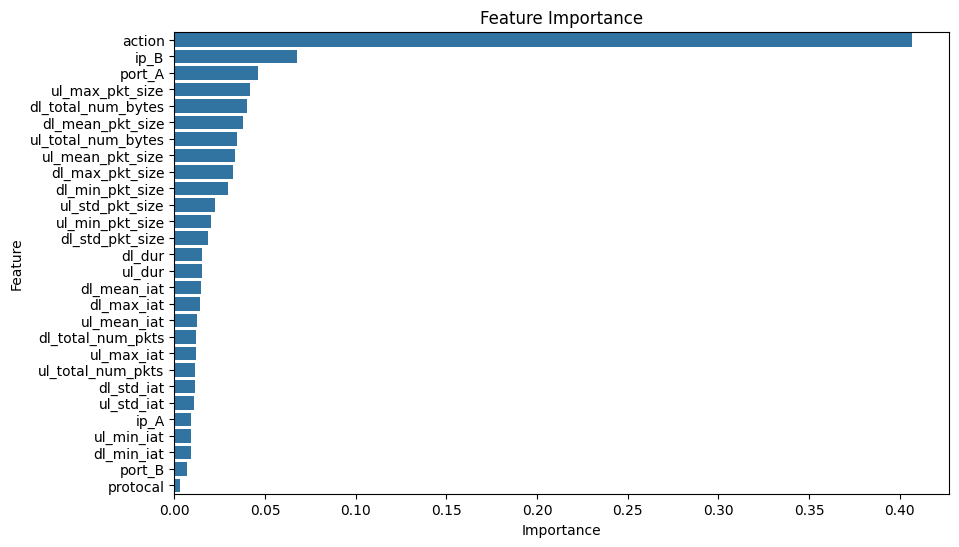

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have feature_importance_df from the previous code

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Accuracy: 0.75
Precision: 0.75
Recall: 0.75
F1 Score: 0.75
ROC AUC Score: 0.92


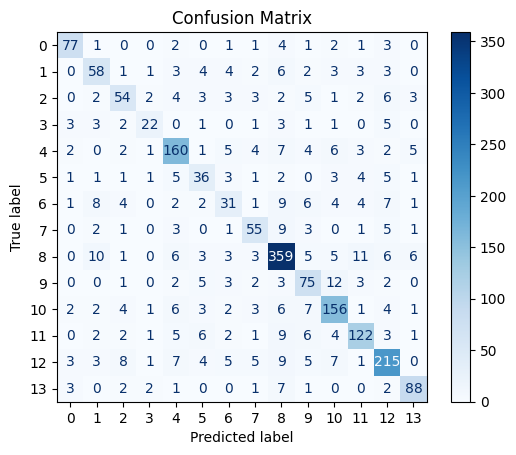

InvalidIndexError: (slice(None, None, None), 0)

In [73]:
#without action
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
import matplotlib.pyplot as plt

# Load the cleaned CSV file
df = pd.read_csv('Processed_random.csv')

# Remove the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
    
df = df.drop('action', axis=1)
# Define the features (X) and target (y)
X = df.drop('app', axis=1)
y = df['app']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(pd.get_dummies(y_test), model.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr = {}
tpr = {}
roc_auc = {}
for i, label in enumerate(model.classes_):
    fpr[label], tpr[label], _ = roc_curve(pd.get_dummies(y_test)[:, i], model.predict_proba(X_test)[:, i])
    roc_auc[label] = roc_auc_score(pd.get_dummies(y_test)[:, i], model.predict_proba(X_test)[:, i])

# Plot ROC Curves
plt.figure(figsize=(10, 8))
for label in model.classes_:
    plt.plot(fpr[label], tpr[label], label=f"{label} (area = {roc_auc[label]:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


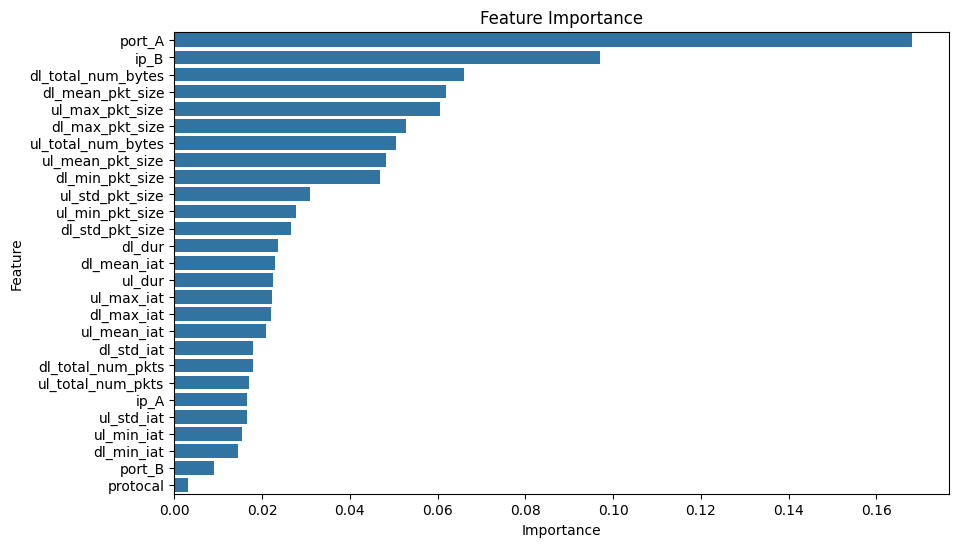

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have feature_importance_df from the previous code

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()